## 1. 平稳性
1. 读取数据
2. 检验原始数据平稳性
2. 差分
3. 检验差分平稳性
4. p-value

In [1]:
# 读取数据
import pandas as pd

data = pd.read_excel('./HFData.xlsx').set_index('datetime')

Dickey-Fuller的零假设是有一个单位根，另一种假设是没有单位根。如果pvalue大于一个临界大小，那么我们不能拒绝有一个单位根。

In [2]:
from statsmodels.tsa.stattools import adfuller 

print('原始序列的检验结果为：',adfuller(data['close'].dropna().values)) 
print('原始序列p-value结果为：',adfuller(data['close'].dropna().values)[1]) 

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


原始序列的检验结果为： (-2.1141723681990077, 0.23885413973689235, 24, 8663, {'1%': -3.4311050777703302, '5%': -2.8618736937872296, '10%': -2.566947620253096}, 57380.39848402708)
原始序列p-value结果为： 0.23885413973689235


In [3]:
# 进行差分
data['diffClose'] = data['close'].diff()
diffClose = data['diffClose'].dropna().values

In [4]:
#平稳性检测 
from statsmodels.tsa.stattools import adfuller 
print('差分序列的p-value结果为：',adfuller(diffClose)[1]) 

差分序列的p-value结果为： 3.847990367587417e-29


## 2. 自相关
1. ACF
2. PACF

In [5]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

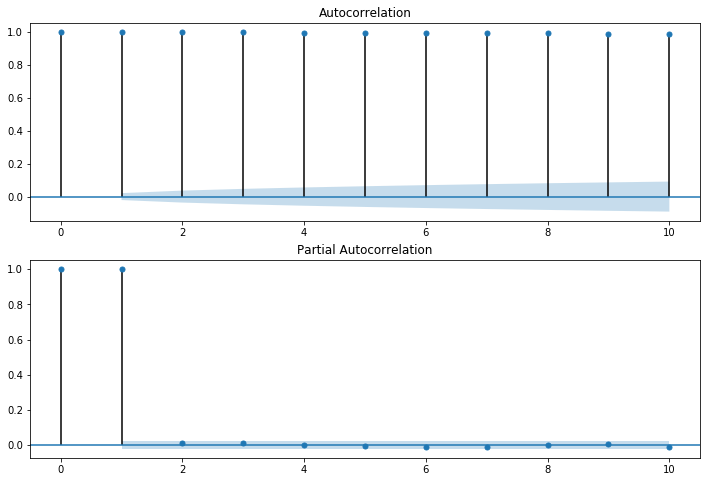

In [6]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.close,lags=10,ax=ax1)#自相关系数图
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.close,lags=10,ax=ax2)#偏自相关系数图
plt.show()

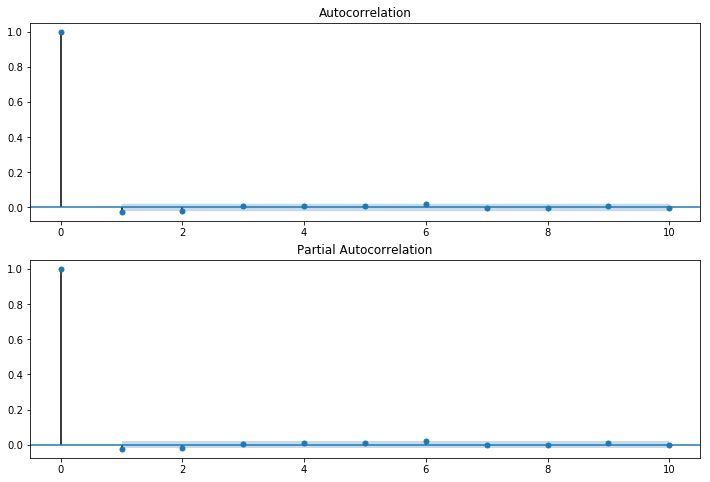

In [7]:
# 观察处理后数据的ACF和PACF
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diffClose,lags=10,ax=ax1)#自相关系数图
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diffClose,lags=10,ax=ax2)#偏自相关系数图
plt.show()

## 3. 白噪声
1. 生成白噪声
2. 生成随机游走

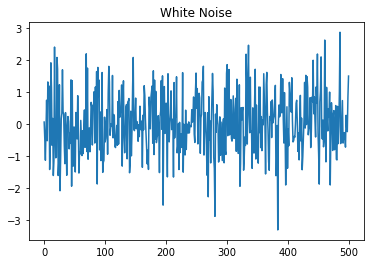

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


n = 500
white_noise = np.random.standard_normal(size=n)
plt.plot(white_noise)
plt.title('White Noise')
plt.show()

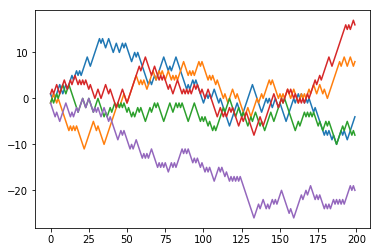

In [9]:
import matplotlib.pyplot as plt
import numpy as np

nwalks = 5
nsteps = 200
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(nwalks):
    ax.plot(walks[i])

plt.show()

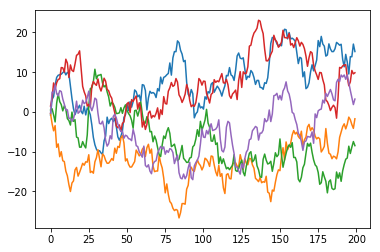

In [15]:
steps = np.random.normal(loc=0, scale=2, size=(nwalks, nsteps))
walks = steps.cumsum(1)
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(nwalks):
    ax.plot(walks[i])

plt.show()

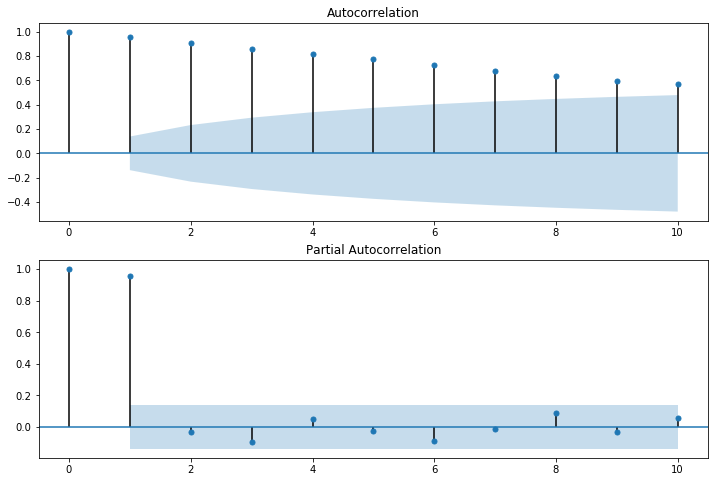

In [17]:
# 观察处理后数据的ACF和PACF
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(walks[0],lags=10,ax=ax1)#自相关系数图
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(walks[0],lags=10,ax=ax2)#偏自相关系数图
plt.show()